## 이산형 확률분포
- 1차원 이산형 확률분포

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

'%.3f'

## 이산형 확률
- 확률변수 x가 취할 수 있는 값의 집합 {x_1, x_2, ..., x_k}
- x가 x_k라는 값을 취하는 확률
![](../picture/이산확률.png)

- 확률 질량함수(확률함수)-pmf
![](../picture/pmf.png)

## 불공정한 주사위

![](../picture/표4-2.jpg)


- 위 불공정한 주사위 확률분포의 확률변수 확인
![](../picture/불공정한주사위확률변수.png)

In [29]:
# 위 식을 함수로 구현

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [30]:
# 확률변수가 취할 수 있는 값의 set
x_set=np.array([1,2,3,4,5,6])

In [31]:
# 확률변수 x
X=[x_set, f] # 확률분포[x_set,f]에 의해 확률변수 X의 동작이 결정됨

# f가 확률분포로 구성


In [32]:
# 확률 p_k를 구한다

prob = np.array([f(x_k) for x_k in x_set])

x_set # 상태공간
prob

zip(x_set,prob) # 동일한 인덱스 끼리 묶어주는 기능 zip 함수


# x_k와 p_k의 대응을 딕셔너리로 표현
dict(zip(x_set,prob))

array([1, 2, 3, 4, 5, 6])

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

<BarContainer object of 6 artists>

Text(0.5, 0, 'value')

Text(0, 0.5, 'probability')

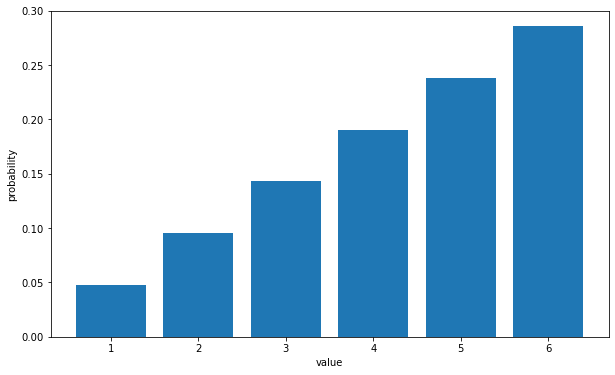

In [33]:
# 이산형 확률분포 그래프
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111) #sub플랏 공간을 하나 생성
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()


## 이상형 확률분포 성질
- 모든 확률은 0보다 큼
- 확률의 합은 1

![](../picture/이산확률성질.png)

In [34]:
prob

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

In [35]:
np.sum(prob)
np.all(prob>=0)

0.9999999999999999

True

## 누적분포함수(분포함수) F(x)
- X가 x이하 일 때 확률을 반환하는 함수
- 누적분포함수(cdf)는 주어진 확률변수가 특정 값보다 작거나 같은 확률을 나타내는 함수
![](../picture/이산누적.png)

In [36]:
# 작거나 같은 이무로 주어진 x보다 작거나 같은 동안의 확률을 모두 더함

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [37]:
# 주사위의 눈이 3이하가 될 확률
F(3) # x_set의 원소값이 3보다 작거나 같을 때 까지의 확률의 합계
f(3) # x_set의 원소값이 3일때 확률

0.2857142857142857

0.143

## 확률변수의 변환
- 확률변수에 연상을 적용시켜 변화시킨다고 가졍 => 새로운 데이터 집합
- 확률변수의 변환 연산 : 2X+3
- 위 연산을 적요시켜 변환된 확률변수를 Y라고 한다면

In [38]:
y_set=np.array([2*x_k + 3 for x_k in x_set])

prob = np.array([f(x_k) for x_k in x_set])

dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

## 1차원 이산형 확률변수의 지표

- 확률변수의 평균 : 기대값
    - 확률변수를 무제한 시행하여 얻은 실험값의 합산

![](../picture/기대값1.png)

- 수식을 함수로 구현
![](../picture/기대값함수구현.png)
- 인수 g가 확률변수에 대한 연산을 구현한 함수
    - g에 아무것도 지정하지 않으면 확률변수 x의 기대값이 구해짐

## 불공정 주사위 확률에 대한 기대값

In [39]:
# 불공정 주사위에 대한 확률변수
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [40]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
    
x_set = np.array([1, 2, 3, 4, 5, 6])


In [41]:
[x_k*f(x_k) for x_k in x_set] # 기존값에 확률 가중치를 곱해주면 기대값

[0.047619047619047616,
 0.19047619047619047,
 0.42857142857142855,
 0.7619047619047619,
 1.1904761904761905,
 1.7142857142857142]

In [42]:
np.sum([x_k*f(x_k) for x_k in x_set])

4.333333333333333

In [43]:
prob

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

In [44]:
# 기대값 확인 (수동)

1*0.048 + 2*0.095 + 3*0.143 + 4*0.19 + 5*0.238 + 6*0.286

4.333

In [45]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332613

In [46]:
def E(X, g=lambda x:x) : # X : 이산형 확률변수 
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])


In [47]:
E(X)

4.333333333333333

In [48]:
E(X, g=lambda x:2*x+3)

11.666666666666664

In [49]:
2*E(X)+3

11.666666666666666

## 분산
- 확률변수의 각 값에서 기대값을 뺀 편차의 제곱을 계산한 후 기대값으로 계산
![](../picture/이산분산.png)

In [50]:
## 불공정한 주사위의 분산

mean=E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [51]:
def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [52]:
V(X)

2.2222222222222223

In [53]:
## 확률변수 X에 대한 변환변수 2X+3 분산 계산
V(X, lambda x:2*x+3)

8.88888888888889

![](../picture/분산의공식.png)

In [54]:
2**2*V(X)

8.88888888888889